### Simple tasks
---
<b>METIS, Éveha International</b><br>
Author : Thomas Aubertier (thomas.aubertier@etu.sorbonne-universite.fr)
---

This notebook describe existing sub-functions that are called by more general procedures.

### ``0`` Import

Importing required libraries

In [1]:
import os
import numpy as np
#%matplotlib widget # Enable mpl toolbar
import matplotlib.pyplot as plt
import pandas as pd

import geophpy as geo
import geophpy.emi as gemi
import geophpy.visualization as gvis

### ``1`` Profile/Base detection

**Without GPS**

If the file is raw (which mean that the y axis is not set to the right value), one can use ``geophpy.no_gps_pos`` :
* File/Dataset list (or a single one)
* ``sep`` Dataset separator (if not loaded)

Output :
* Dataset list (or a single one) with interpolated y coordinate

In [2]:
# Your data path, if not in current working directory
os.chdir("/home/taubertier/StageMETIS/2024 2025 Aubertier/fichiers donnees/Divers/")

no_gps_data = geo.no_gps_pos("Lim2705Lo.dat", sep='\t')[0]

In [3]:
print(no_gps_data)

      x[m]   y[m]        Date         Time  Cond.1[mS/m]  Inph.1[ppt]  \
0     -1.0   0.00  05/27/2021  09:25:04.41         40.72         1.94   
1     -1.0   0.05  05/27/2021  09:25:04.63         40.72         1.94   
2     -1.0   0.10  05/27/2021  09:25:04.81         41.65         1.93   
3     -1.0   0.15  05/27/2021  09:25:05.00         41.81         1.92   
4     -1.0   0.19  05/27/2021  09:25:05.23         41.67         1.93   
...    ...    ...         ...          ...           ...          ...   
6974  -4.0  18.68  05/27/2021  11:34:41.42         39.09         2.18   
6975  -4.0  18.76  05/27/2021  11:34:41.60         39.35         2.17   
6976  -4.0  18.84  05/27/2021  11:34:41.81         39.12         2.18   
6977  -4.0  18.92  05/27/2021  11:34:42.02         38.57         2.19   
6978  -4.0  19.00  05/27/2021  11:34:42.20         38.12         2.20   

      Cond.2[mS/m]  Inph.2[ppt]  Cond.3[mS/m]  Inph.3[ppt]  Inv.Cond.1[mS/m]  \
0            28.44         2.28         30.

Datasets with no GPS data are very easy to splice in profile, since they are dependant of the ``"x[m]"`` coordinate column.

``geophpy.detect_profile_square`` does the trick :
* Dataset

Output :
* Dataset with three more columns :
    - ``"Base"`` Id of base (0 if profile)
    - ``"Profile"`` Id of profile (0 if profile)
    - ``"B+P"`` Cumulative id on base and profile

In [4]:
prof_dataset = geo.detect_profile_square(no_gps_data)

In [5]:
print(prof_dataset)

      x[m]   y[m]        Date         Time  Cond.1[mS/m]  Inph.1[ppt]  \
0     -1.0   0.00  05/27/2021  09:25:04.41         40.72         1.94   
1     -1.0   0.05  05/27/2021  09:25:04.63         40.72         1.94   
2     -1.0   0.10  05/27/2021  09:25:04.81         41.65         1.93   
3     -1.0   0.15  05/27/2021  09:25:05.00         41.81         1.92   
4     -1.0   0.19  05/27/2021  09:25:05.23         41.67         1.93   
...    ...    ...         ...          ...           ...          ...   
6974  -4.0  18.68  05/27/2021  11:34:41.42         39.09         2.18   
6975  -4.0  18.76  05/27/2021  11:34:41.60         39.35         2.17   
6976  -4.0  18.84  05/27/2021  11:34:41.81         39.12         2.18   
6977  -4.0  18.92  05/27/2021  11:34:42.02         38.57         2.19   
6978  -4.0  19.00  05/27/2021  11:34:42.20         38.12         2.20   

      Cond.2[mS/m]  Inph.2[ppt]  Cond.3[mS/m]  Inph.3[ppt]  Inv.Cond.1[mS/m]  \
0            28.44         2.28         30.

**With GPS**

*Note : works better if the entire prospection is considered, since the first profile must be a base.*

GPS files do not contain any information regarding profiles, mostly because the prospection method can be more versatile.

The most reliable technique is to look for significant time gaps, which indicate a preparation between two profiles.

``geophpy.detect_chgt`` :
* Dataset
* Array of labels of X and Y columns

Output :
* Dataset with one more columns :
    - ``"B+P"`` Cumulative id on base and profile

In [6]:
# Your data path, if not in current working directory
os.chdir("/home/taubertier/StageMETIS/2024 2025 Aubertier/fichiers donnees/CMD mini explorer 3L GPS/HCP/")

hcp1 = pd.read_csv("hcpmini-Tr.dat", sep='\t')
hcp1["File_id"] = 1
hcp2 = pd.read_csv("hcpmini-Tr2.dat", sep='\t')
hcp2["File_id"] = 2
hcp3 = pd.read_csv("hcpmini-Tr3.dat", sep='\t')
hcp3["File_id"] = 3

full_data = pd.concat([hcp1,hcp2,hcp3])
full_data.reset_index(drop=True,inplace=True)

In [7]:
full_data = geo.detect_chgt(full_data,["Easting","Northing"])

In [8]:
print(full_data)

            Easting     Northing  Altitude        Date         Time   DOP  \
0      5.315669e+06  397608.1954   127.961  10/15/2024  07:47:57.37  0.67   
1      5.315669e+06  397608.2249   127.964  10/15/2024  07:47:57.80  0.67   
2      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.17  0.67   
3      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.60  0.67   
4      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.97  0.67   
...             ...          ...       ...         ...          ...   ...   
19721  5.315668e+06  397608.3361   126.515  10/17/2024  07:52:17.94  0.68   
19722  5.315668e+06  397608.3361   126.515  10/17/2024  07:52:18.36  0.68   
19723  5.315669e+06  397608.1184   126.595  10/17/2024  07:52:18.78  0.68   
19724  5.315669e+06  397608.1184   126.595  10/17/2024  07:52:19.14  0.68   
19725  5.315667e+06  397608.2118   126.690  10/17/2024  07:52:19.56  1.42   

       Satelites  Cond.1[mS/m]  Inph.1[ppt]  Cond.2[mS/m]  ...  Cond.3[mS/m

We can then sort base and profile (as long as the first set of points is a base) with ``geophpy.detect_base_pos`` :
* Dataframe
* ``thr`` Threshold used to decide between base and profile (by default 2, must be raised if some of the base is remaining)

Output :
* Dataset with two more columns :
    - ``"Base"`` Id of base (0 if profile)
    - ``"Profile"`` Id of profile (0 if profile)

In [9]:
full_data_itp = geo.detect_base_pos(full_data,2)

In [10]:
print(full_data_itp)

            Easting     Northing  Altitude        Date         Time   DOP  \
0      5.315669e+06  397608.1954   127.961  10/15/2024  07:47:57.37  0.67   
1      5.315669e+06  397608.2249   127.964  10/15/2024  07:47:57.80  0.67   
2      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.17  0.67   
3      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.60  0.67   
4      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.97  0.67   
...             ...          ...       ...         ...          ...   ...   
19721  5.315668e+06  397608.3361   126.515  10/17/2024  07:52:17.94  0.68   
19722  5.315668e+06  397608.3361   126.515  10/17/2024  07:52:18.36  0.68   
19723  5.315669e+06  397608.1184   126.595  10/17/2024  07:52:18.78  0.68   
19724  5.315669e+06  397608.1184   126.595  10/17/2024  07:52:19.14  0.68   
19725  5.315667e+06  397608.2118   126.690  10/17/2024  07:52:19.56  1.42   

       Satelites  Cond.1[mS/m]  Inph.1[ppt]  Cond.2[mS/m]  ...  \
0        

**Continuous prospection**

If profiles can't be determined from time (some of them may not have clear profiles anyways), we can estimate them with pseudo-profiles that try to fit the trajectory as much as possible. They are not necessarely straight, though they must be sufficient to represent a coherent evolution.

To be short, the algorithm takes a set of 
 segments (if none, takes the linear regression) as a list of 
 coordinates. Theses segments must cut each pseudo-profile once to detect them correctly.

 ``geophpy.detect_pseudoprof`` :
 * Dataframe
 * X coordinate column label
 * Y coordinate column label
 * ``l_p`` Set of points for segments (by default none)

Output :
* Dataframe with one more column :
    - ``"B+P"`` Cumulative id on base and profile

In [11]:
# Your data path, if not in current working directory
os.chdir("/home/taubertier/StageMETIS/2024 2025 Aubertier/fichiers donnees/Divers/")

pp = pd.read_csv("cmd_GPS_survey.dat", sep='\t')

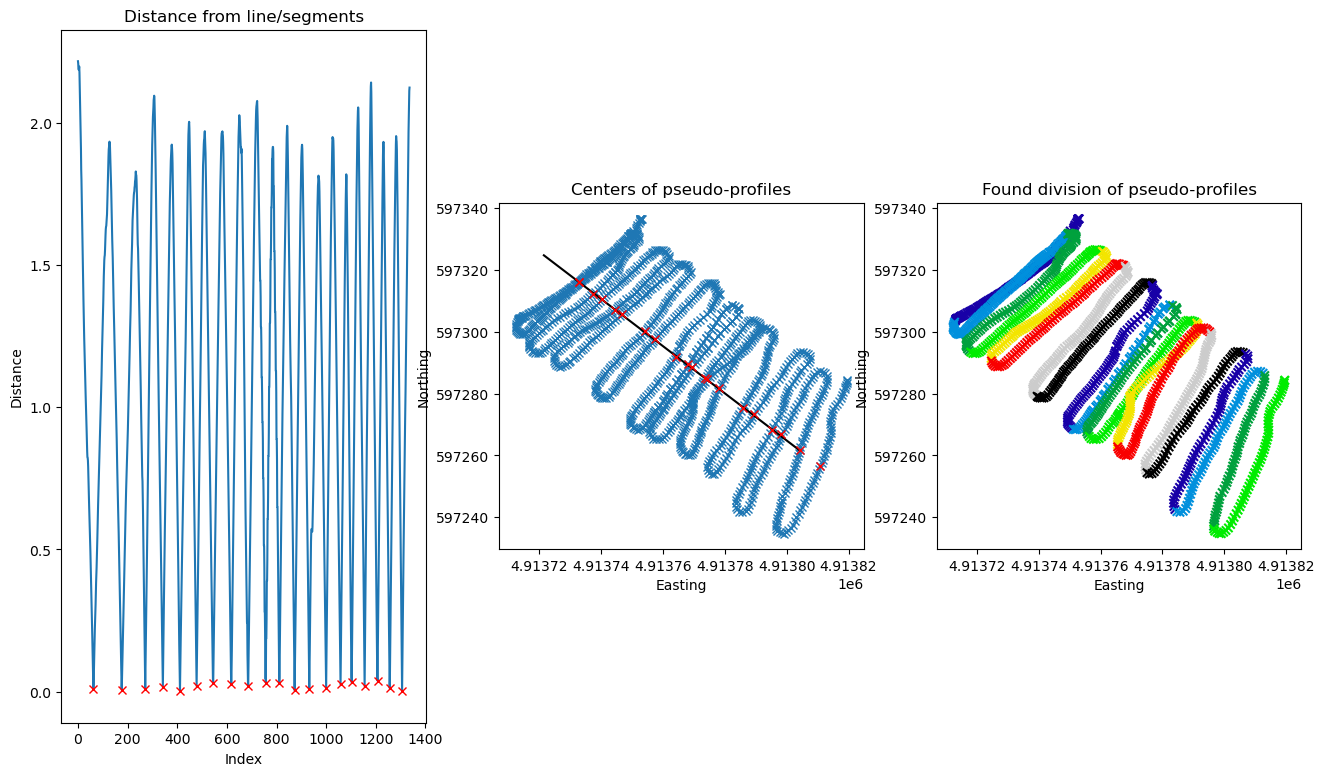

In [12]:
pp = geo.detect_pseudoprof(pp,"Easting","Northing",plot=True)

In [13]:
pp2 = pd.read_csv("cmd_GPS_survey_missing_coordinates.dat", sep='\t')

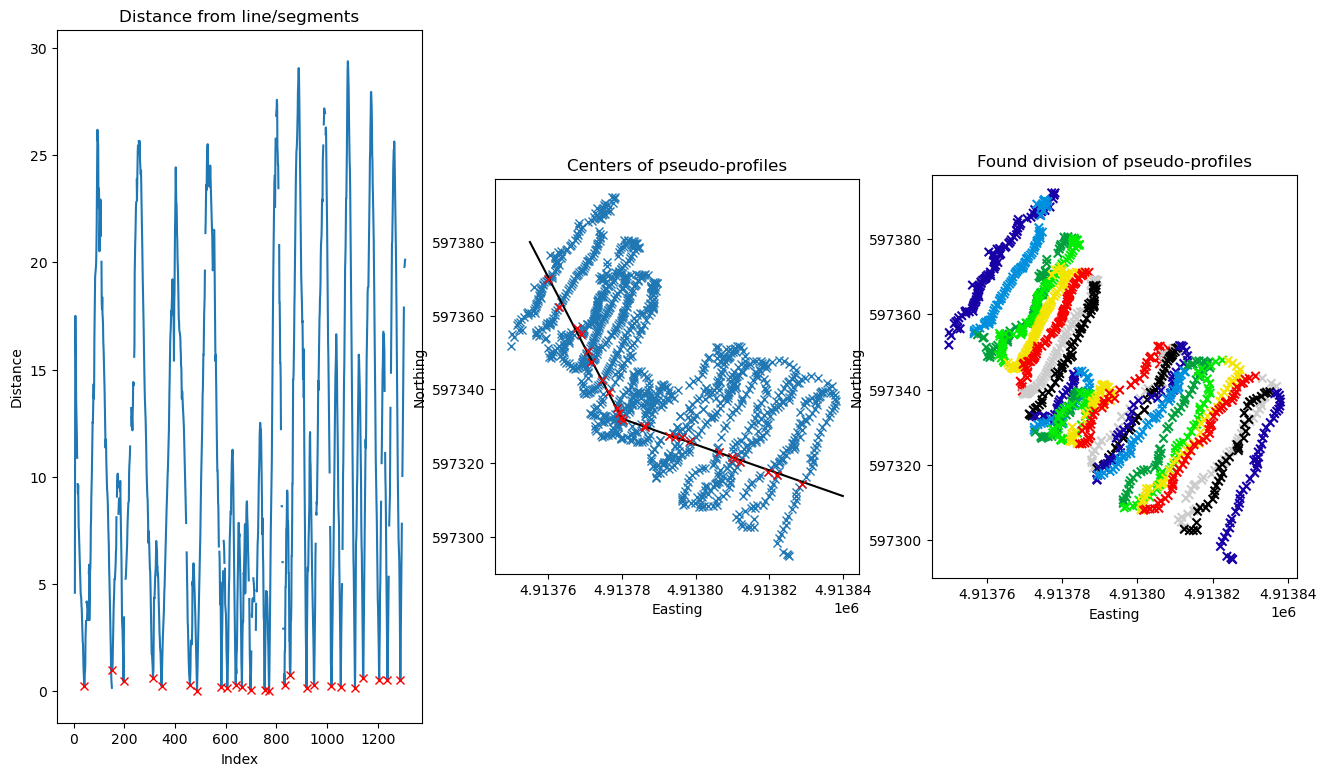

In [14]:
pp2 = geo.detect_pseudoprof(pp2,"Easting","Northing",plot=True,
                           l_p=[[4913755,597380],[4913780,597332],[4913840,597311]])

**Base management**

``geophpy.sep_BP``split profiles and bases in two new datasets :
* Dataframe

Output : 
* Profile dataframe
* Base dataframe

In [15]:
base, profile = geo.sep_BP(full_data_itp)

In [16]:
print("BASE",base)
print("PROFILE",profile)

BASE             Easting     Northing  Altitude        Date         Time   DOP  \
0      5.315669e+06  397608.1954   127.961  10/15/2024  07:47:57.37  0.67   
1      5.315669e+06  397608.2249   127.964  10/15/2024  07:47:57.80  0.67   
2      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.17  0.67   
3      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.60  0.67   
4      5.315669e+06  397608.2271   127.966  10/15/2024  07:47:58.97  0.67   
...             ...          ...       ...         ...          ...   ...   
19721  5.315668e+06  397608.3361   126.515  10/17/2024  07:52:17.94  0.68   
19722  5.315668e+06  397608.3361   126.515  10/17/2024  07:52:18.36  0.68   
19723  5.315669e+06  397608.1184   126.595  10/17/2024  07:52:18.78  0.68   
19724  5.315669e+06  397608.1184   126.595  10/17/2024  07:52:19.14  0.68   
19725  5.315667e+06  397608.2118   126.690  10/17/2024  07:52:19.56  1.42   

       Satelites  Cond.1[mS/m]  Inph.1[ppt]  Cond.2[mS/m]  ...  \
0   

Bases are a set of points, but we only need one value for any procedure that utilize them.
For EM data, we can use ``geophpy.emi.synth_base`` to concatenate each base in one line :
* Dataframe
* List of data columns (order should be Cond.1/Inph.1/Cond.2/Inph.2 [...])
* ``CMD_mini`` If bases have points taken off the ground (by default True)

Output :
* Multiple dataset columns :
    - ``"File_id"`` Id of file (if none, must be initialized before call)
    - ``"B+P"`` Cumulative id on base and profile
    - ``"Seconds"`` Relative time (not very important from now on)
    - Set of data columns with found value (off ground average if ``CMD_mini = True``, else total average)

One example of utilisation is found below :

In [17]:
d_nf,d_bp,d_t,d_min = gemi.synth_base(base,base.columns[7:13],True)
base = d_min.transpose()
base["File_id"] = d_nf
base["Seconds"] = d_t
base["B+P"] = d_bp
base["Base"] = d_t.index+1
base["Profil"] = 0

In [18]:
print(base)

   Cond.1[mS/m]  Inph.1[ppt]  Cond.2[mS/m]  Inph.2[ppt]  Cond.3[mS/m]  \
0          1.76         2.64          3.76         2.89          6.06   
1          1.72         2.64          3.74         2.89          5.99   
2          1.80         2.64          3.76         2.88          5.98   
3          1.82         2.63          3.68         2.87          5.93   
4          1.81         2.63          3.66         2.87          5.91   
5          1.77         2.63          3.71         2.87          6.04   
6          1.72         2.63          3.69         2.89          6.03   
7          1.81         2.64          3.87         2.89          6.21   
8          1.85         2.63          3.96         2.88          6.31   

   Inph.3[ppt]  File_id   Seconds  B+P  Base  Profil  
0         3.25        1  28090.98    1     1       0  
1         3.25        1  29877.20   23     2       0  
2         3.25        1  31506.37   44     3       0  
3         3.25        2  33250.06   64     4     

### ``2`` NaN completion

**Discontinuous prospection**

If the dataset have straight profiles, the best way to estimate coordinates of unknown point (from a known profile) is to interpolate positions of point of same profile with their order (or index).

``geophpy.XY_Nan_completion`` :
* Dataframe
* ``x_col`` X column label (by default ``"X_int"``, interpolated position)
* ``y_col`` Y column label (by default ``"Y_int"``, interpolated position)

Output :
* Dataframe completed

*Note : from now on, we will continue with only one of the three HCP file.*

In [19]:
hcp_p = profile[profile["File_id"] == 2]
hcp_b = base[base["File_id"] == 2]
# For conveniece
hcp_p.reset_index(drop=True,inplace=True)
hcp_b.reset_index(drop=True,inplace=True)

In [20]:
x_col = hcp_p[hcp_p.columns[0]]
nan_index = x_col.index[x_col.isna()]
print(hcp_p.iloc[nan_index, [0,1]]+list(range(7,9)))

      Easting  Northing
1128      NaN       NaN
1129      NaN       NaN
1130      NaN       NaN
1131      NaN       NaN
1132      NaN       NaN
1133      NaN       NaN
1134      NaN       NaN
1135      NaN       NaN
1136      NaN       NaN
1137      NaN       NaN
1138      NaN       NaN
1139      NaN       NaN
1140      NaN       NaN
1141      NaN       NaN
1142      NaN       NaN
1143      NaN       NaN
1144      NaN       NaN
1145      NaN       NaN
1146      NaN       NaN
1147      NaN       NaN
1148      NaN       NaN
1149      NaN       NaN
1150      NaN       NaN
1151      NaN       NaN
1152      NaN       NaN
1153      NaN       NaN
1154      NaN       NaN
1155      NaN       NaN
1156      NaN       NaN
1157      NaN       NaN
1158      NaN       NaN
1159      NaN       NaN
1160      NaN       NaN
1161      NaN       NaN
1162      NaN       NaN
1163      NaN       NaN
1164      NaN       NaN
1165      NaN       NaN
1166      NaN       NaN
1167      NaN       NaN
1168      NaN   

In [21]:
hcp_p = geo.XY_Nan_completion(hcp_p,"Easting","Northing")

NaNs completed : 48


In [22]:
print(hcp_p.iloc[nan_index, [0,1]+list(range(7,9))])

           Easting       Northing  Cond.1[mS/m]  Inph.1[ppt]
1128  5.315659e+06  397608.882017         22.55         2.62
1129  5.315659e+06  397608.403626         21.68         2.62
1130  5.315659e+06  397607.925236         22.25         2.61
1131  5.315659e+06  397607.446845         22.72         2.63
1132  5.315659e+06  397606.968454         18.73         2.61
1133  5.315659e+06  397606.490063         20.35         2.60
1134  5.315658e+06  397606.011672         23.34         2.65
1135  5.315658e+06  397605.533282         20.84         2.61
1136  5.315658e+06  397605.054891         18.69         2.61
1137  5.315658e+06  397604.576500         18.21         2.62
1138  5.315658e+06  397604.098109         17.43         2.60
1139  5.315658e+06  397603.619718         21.64         2.62
1140  5.315657e+06  397603.141328         20.52         2.62
1141  5.315657e+06  397602.662937         20.00         2.60
1142  5.315657e+06  397602.184546         22.09         2.63
1143  5.315657e+06  3976

**Continuous prospection**

A more general approach is to interpolate NaN points from the two nearest defined neighbor (before and after).

``geophpy.XY_Nan_completion_solo`` :
* Dataframe
* ``x_col`` X column label (by default ``"X_int"``, interpolated position)
* ``y_col`` Y column label (by default ``"Y_int"``, interpolated position)

Output :
* Dataframe completed

In [23]:
x_col = pp2[pp2.columns[0]]
nan_index = x_col.index[x_col.isna()]
print(pp2.iloc[nan_index, [0,1]+list(range(7,9))])

      Easting  Northing  Cond.1[mS/m]  Inph.1[ppt]
1         NaN       NaN         20.95         1.76
2         NaN       NaN         21.04         1.78
3         NaN       NaN         21.31         1.78
4         NaN       NaN         20.54         1.78
15        NaN       NaN         18.37         1.77
50        NaN       NaN         21.74         1.75
59        NaN       NaN         20.24         1.77
109       NaN       NaN         34.13         1.77
152       NaN       NaN         22.59         1.75
170       NaN       NaN         24.11         1.77
176       NaN       NaN         25.01         1.77
182       NaN       NaN         23.05         1.77
200       NaN       NaN         19.91         1.71
202       NaN       NaN         20.87         1.72
204       NaN       NaN         21.07         1.74
224       NaN       NaN         23.23         1.76
226       NaN       NaN         24.05         1.76
238       NaN       NaN         29.85         1.76
248       NaN       NaN        

In [24]:
pp2 = geo.XY_Nan_completion_solo(pp2,"Easting","Northing")

Valeurs remplacées : 56


In [25]:
print(pp2.iloc[nan_index, [0,1]+list(range(7,9))])

           Easting       Northing  Cond.1[mS/m]  Inph.1[ppt]
1     4.913753e+06  597358.530000         20.95         1.76
2     4.913754e+06  597360.840000         21.04         1.78
3     4.913755e+06  597363.150000         21.31         1.78
4     4.913755e+06  597365.460000         20.54         1.78
15    4.913754e+06  597359.910000         18.37         1.77
50    4.913763e+06  597373.390000         21.74         1.75
59    4.913763e+06  597375.280000         20.24         1.77
109   4.913775e+06  597386.920000         34.13         1.77
152   4.913763e+06  597363.045000         22.59         1.75
170   4.913758e+06  597356.225000         24.11         1.77
176   4.913758e+06  597354.205000         25.01         1.77
182   4.913761e+06  597348.855000         23.05         1.77
200   4.913771e+06  597357.690000         19.91         1.71
202   4.913772e+06  597357.825000         20.87         1.72
204   4.913772e+06  597358.055000         21.07         1.74
224   4.913775e+06  5973

### ``3`` Position interpolation

Usually in GPS data, the frequency of measurement is faster than the GPS position refresh, meaning that several consecutive points can be given the same position.

This means that plotting such dataset will hide a huge portion as points are overlapping.

If so, we can calculate a new position using neighbor points.

``geophpy.intrp_prof``:
* Dataframe
* X column label
* Y column label

Output : 
* Dataframe with one more columns :
    - ``"X_int"`` Adjusted X positions
    - ``"Y_int"`` Adjusted Y positions

*Note : ``"Easting"`` and ``"Northing"`` are swapped in the raw file, so we have to manually change the column order. This is done automatically in the ``init_process``procedure.*

In [26]:
hcp_p = geo.switch_cols(hcp_p,"Easting","Northing")[0] # Returns an array of dataframe

In [27]:
hcp_p = geo.intrp_prof(hcp_p,"Easting","Northing")

In [28]:
print(hcp_p.loc[:20,["Easting","Northing","X_int","Y_int"]])

        Easting      Northing          X_int         Y_int
0   397642.9827  5.315680e+06  397642.982700  5.315680e+06
1   397642.9827  5.315680e+06  397642.577950  5.315680e+06
2   397642.1732  5.315679e+06  397642.173200  5.315679e+06
3   397642.1732  5.315679e+06  397641.651950  5.315679e+06
4   397641.1307  5.315679e+06  397641.130700  5.315679e+06
5   397641.1307  5.315679e+06  397640.752300  5.315679e+06
6   397641.1307  5.315679e+06  397640.373900  5.315679e+06
7   397639.9955  5.315679e+06  397639.995500  5.315679e+06
8   397639.9955  5.315679e+06  397639.410600  5.315678e+06
9   397638.8257  5.315678e+06  397638.825700  5.315678e+06
10  397638.8257  5.315678e+06  397638.428267  5.315678e+06
11  397638.8257  5.315678e+06  397638.030833  5.315678e+06
12  397637.6334  5.315678e+06  397637.633400  5.315678e+06
13  397637.6334  5.315678e+06  397637.027150  5.315678e+06
14  397636.4209  5.315677e+06  397636.420900  5.315677e+06
15  397636.4209  5.315677e+06  397636.023467  5.315677e+

### ``4`` Profile linearization

In case some profiles waves due to GPS inprecisions, you can linearize them by linear regression using ``geophpy.pts_rectif`` :
* Dataframe
* ``x_col`` X column label (by default ``"X_int"``, interpolated position)
* ``y_col`` Y column label (by default ``"Y_int"``, interpolated position)
* ``ind_deb`` Starting profile (by default is te first profile)
* ``ind_fin`` Ending profile (by default is the last profile)

Output :
* Dataframe where every profile between ``ind_deb`` and ``ind_fin`` (in chronological order) is straight.

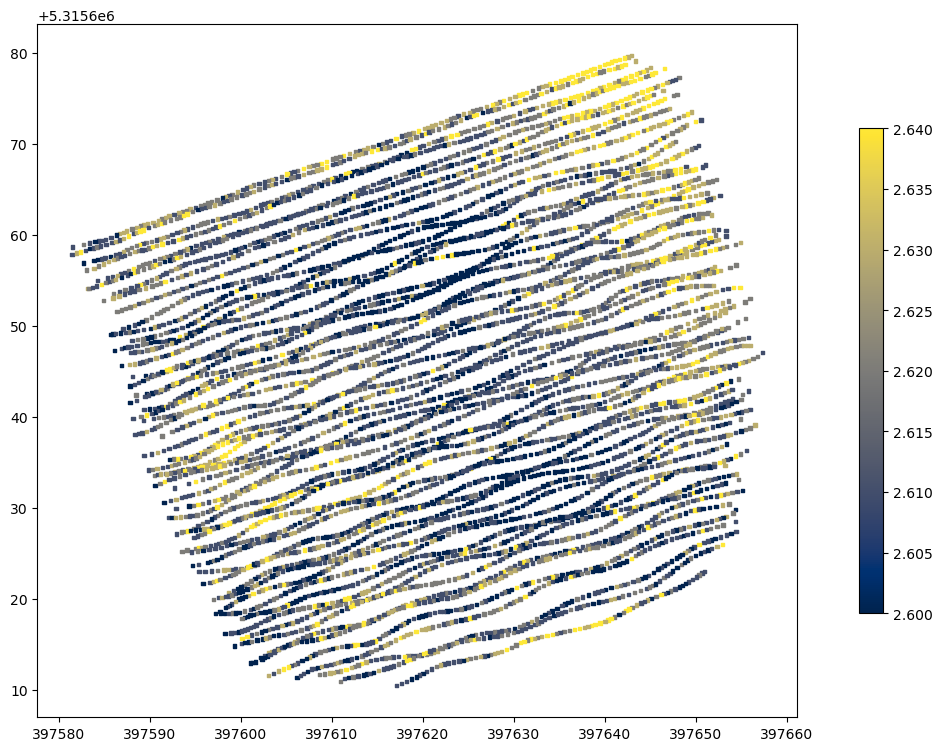

In [29]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,9))
Z = hcp_p["Inph.1[ppt]"]
Q5,Q95 = Z.quantile([0.05,0.95])
col = ax.scatter(hcp_p["X_int"],hcp_p["Y_int"],marker='s',c=Z,cmap='cividis',s=6,vmin=Q5,vmax=Q95)
plt.colorbar(col,ax=ax,shrink=0.7)
ax.set_aspect('equal')
plt.show()

In [30]:
hcp_p = geo.pts_rectif(hcp_p,ind_deb=9)

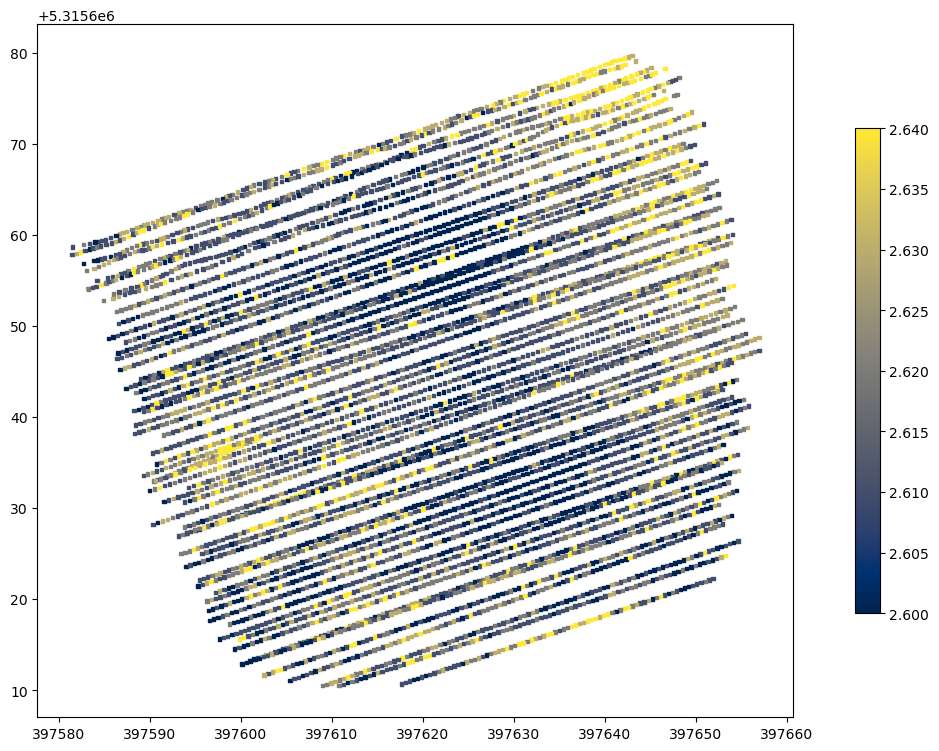

In [31]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,9))
Z = hcp_p["Inph.1[ppt]"]
Q5,Q95 = Z.quantile([0.05,0.95])
col = ax.scatter(hcp_p["X_int"],hcp_p["Y_int"],marker='s',c=Z,cmap='cividis',s=6,vmin=Q5,vmax=Q95)
plt.colorbar(col,ax=ax,shrink=0.7)
ax.set_aspect('equal')
plt.show()

### ``5`` Path positions

Point coordinates does not take into account that the GPS antenna is not necessarely centered and that each path is not measuring the same position (in X and Y axis) due to their coil.

Consequently, each path must have its own position columns.

``geophpy.dec_paths`` :
* Dataframe
* List of output X column names
* List of output Y column names
* Number of paths
* List of distance between each coil and the transmitter coil, on lateral axis (m)
* List of distance between each coil and the transmitter coil, on transversal axis (m)
* Shift between the GPS antenna and the device center, on both axis (should be ``[0,0]`` if none)  (m)

Output :
* Dataframe with new columns for X and Y.

In [32]:
nb_paths = 3
ncx = ["X_int_"+str(e+1) for e in range(nb_paths)]
ncy = ["Y_int_"+str(e+1) for e in range(nb_paths)]

hcp_p = geo.dec_paths(hcp_p,ncx,ncy,nb_paths,[0.32,0.71,1.18],[0,0,0],[0.25,-0.2])

``geophpy.visualization.plot_pos`` shows the found positions :
* Dataframe (or file)

*Note : The output figure is heavy and is more useful with zoom enabled.*

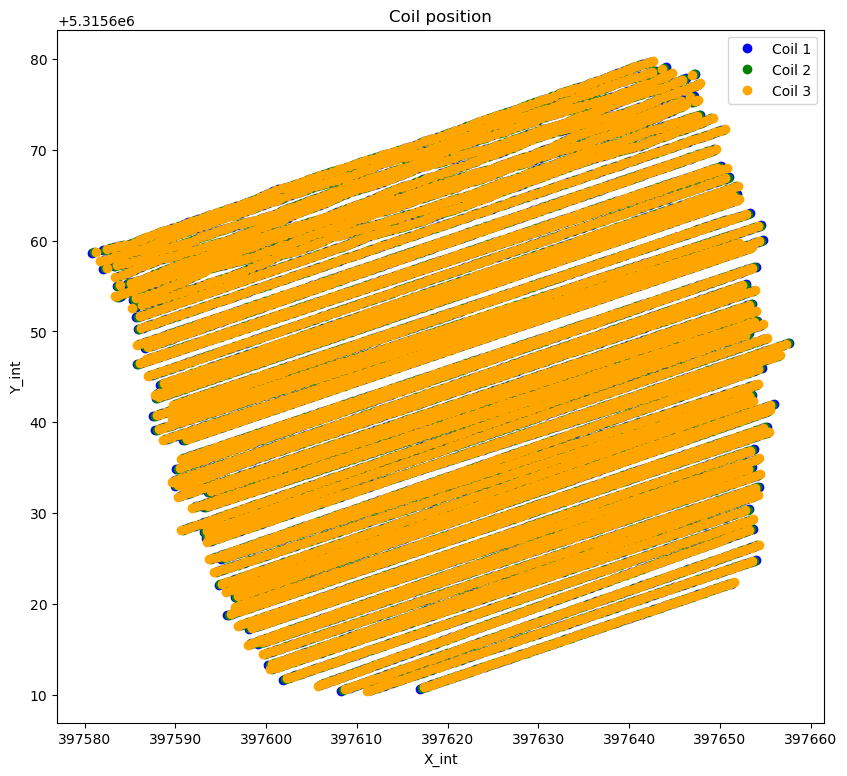

In [33]:
gvis.plot_pos(hcp_p)

### ``6`` Border adjustment

You can get more control on the border ajustment procedure by using advanced parameters. Theses parameters are also available from the general procedure (``geophpy.frontier``).

``geophpy.calc_frontier`` does one iteration of the main loop :
* Dataframe 1 (reference)
* Dataframe 2 (to adjust)
* List of X column labels
* List of Y column labels
* List of data column labels
* Number of paths
* Number of data per coil
* ``choice`` Validate or not each adjustment (dynamic)
* ``l_c`` List of decisions if ``choice = True``

Advanced parameters :
* ``nb`` Minimum number of pairs of points to find for adjustment (scale with the number of total points in both dataframe, default 30)
* ``tol_inter`` Tolerance for rejecting sets that are too far from each other (high = less restrictive, default = 0.1)
* ``tol_intra`` Tolerance for rejecting sets have a contact region that is too small (high = more restrictive, default = 0.2)
* ``m_size`` Size of plotting points (default 40)
* ``verif`` Display various informations regarding step 2 (adjustment values)
* ``verif_pts`` Display various informations regarding step 1 (find pairs)
* ``dat_to_test`` Index of the data to display with ``verif`` (default 0)

Output :
* Dataframe 2 (possibly adjusted)
* If the frontier is valid (boolean) ; is True, dataframe 2 has been successfully adjusted

In [34]:
# Number of data per coil
nb_res = 2
# Need at least two datasets
hcp_p2 = profile[profile["File_id"] == 1]
hcp_p2.reset_index(drop=True,inplace=True)
hcp_p2 = geo.switch_cols(hcp_p2,"Easting","Northing")[0]

hcp_p2 = geo.intrp_prof(hcp_p2,"Easting","Northing")
hcp_p2 = geo.dec_paths(hcp_p2,ncx,ncy,nb_paths,[0.32,0.71,1.18],[0,0,0],[0.25,-0.2])

[14, 7, 27, 84, 13, 184, 45, 31, 12, 38, 50, 20, 24, 175, 46, 41, 201, 28, 26, 33, 29, 183, 42, 8, 25, 36, 17, 22, 213, 58, 59, 23, 19, 55, 51, 52, 291, 72, 34, 21, 54, 18, 234, 229, 62, 39]
[6882, 6889, 6868, 6808, 6883, 6827, 6849, 6864, 6884, 6856, 6843, 6875, 6871, 6818, 6848, 6853, 6844, 6867, 6869, 6860, 6865, 6825, 6852, 6888, 6870, 6858, 6879, 6873, 6857, 6834, 6833, 6872, 6876, 6838, 6842, 6841, 6861, 6820, 6859, 6874, 6839, 6878, 6877, 6668, 6831, 6855]


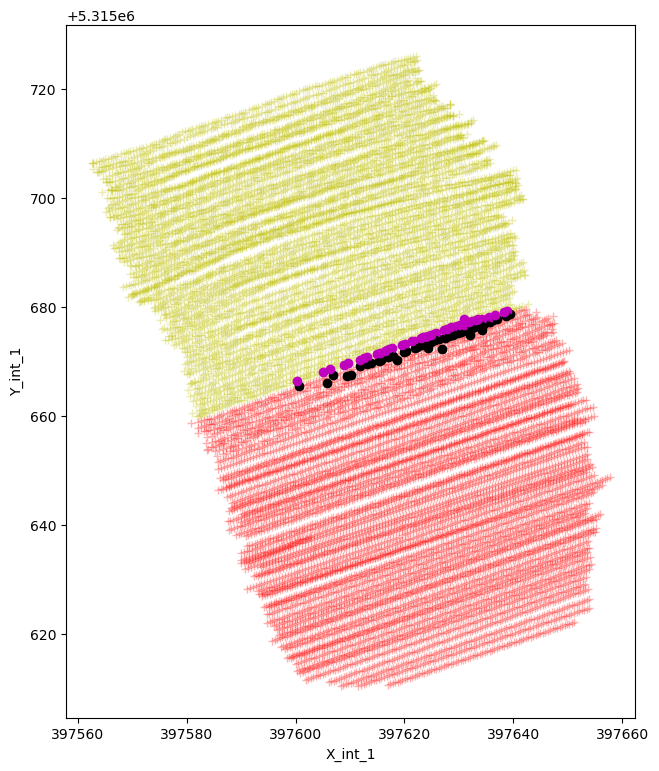

d_moy =  1.4936106739165858
d_caract (inter) =  10.340102998898663
d_max =  40.776760315585555
d_caract (intra) =  20.680205997797326
----------------------------- FRONTIER -----------------------------


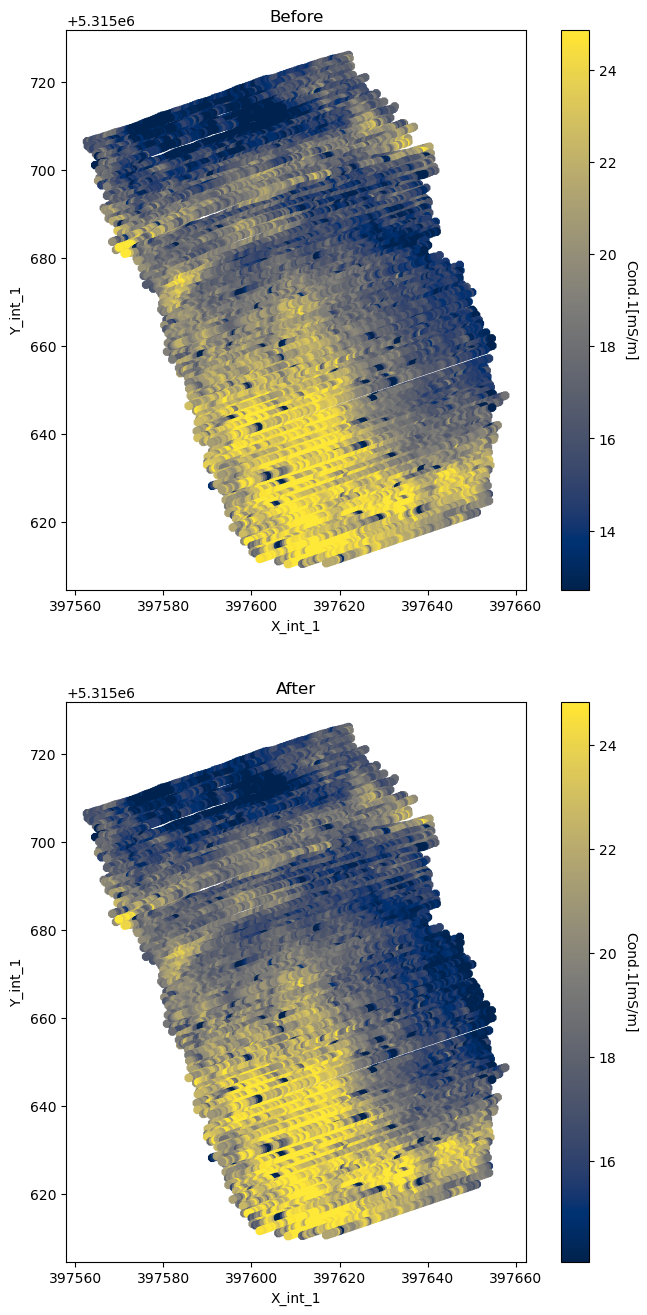

In [35]:
hcp_p2, found = geo.calc_frontier(hcp_p,hcp_p2,[ncx[0]],[ncy[0]],hcp_p.columns[[7,8]],nb_res,1,choice=False,
                        nb=30,tol_inter=0.1,tol_intra=0.2,m_size=30,verif=True,verif_pts=True)

In order :
* The first two lists corresponds to the indexes of the found points, respectively of dataset 1 and 2.
* The first plot represent those points with circles.
* ``d_moy`` is the average distance between points of the same pairs.
* ``d_caract (inter)`` is the maximum accepted value for ``d_moy``.
* ``d_max`` is the maximum distance between two distincts pairs.
* ``d_caract (intra)`` is the minimum accepted value for ``d_max``.
* If successful, plots the result for data of index ``dat_to_test``.

In [36]:
print(found)

True


### ``7`` Grid interpolation

**Part 1 : Restriction grid / Heatmap**

The grid restriction can be calculated alone by using ``geophpy.dat_to_grid`` :
* Dataframe
* List of X column labels
* List of Y column labels
* Number of paths
* Number of data per coil
* ``radius`` Detection radius around each tile for NaN completion
* ``prec`` Grid size (if rectangular, define the longest axis) OR ``step`` Step between each tile (in distance)
* ``w_exp`` Exponent for the detection window
* ``only_nan`` Tiles that contain at least one data point is kept, regardless of its excentricity
* ``heatmap`` If we want the enable the heatmap procudure (dynamic)

Output :
* Grid restriction (0 is in, nan is out). If ``heatmap = True``, returns a two-dimensional array (X and Y) containing the density values instead, else returns a three-dimensional array (path, X and Y)
* Array containing ``min_X``,``max_X``,``min_y`` and ``max_Y`` (relative to the X and Y data columns)
* Array containing ``prec_X`` and ``prec_Y``, the number of tile for each axis

=== Grid construction phase ===
=== HEATMAP ===


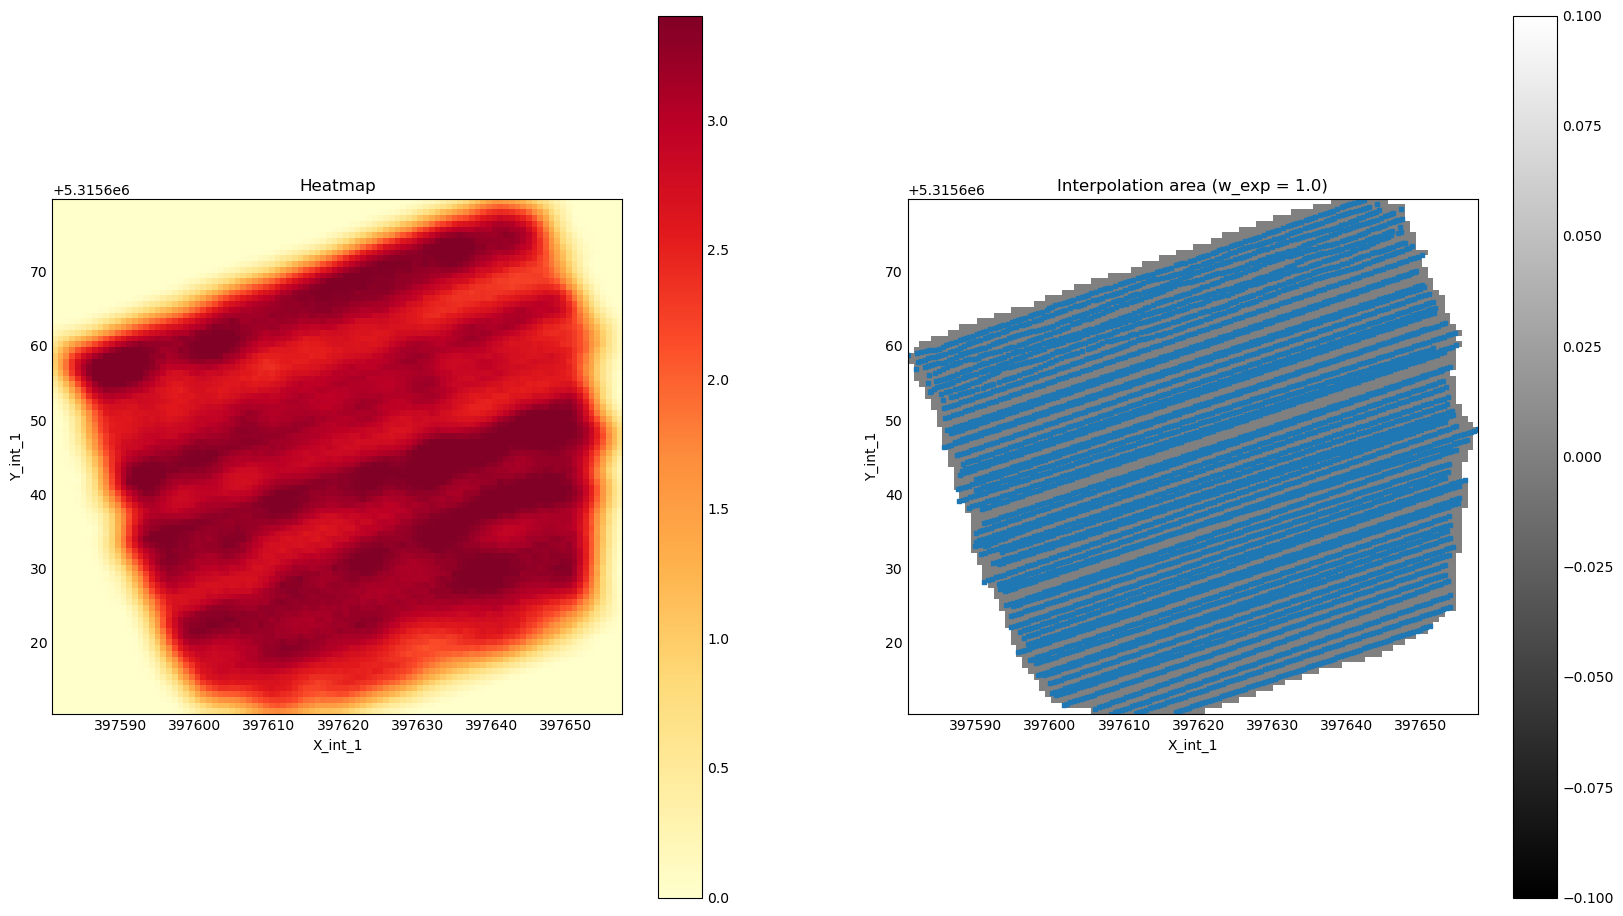


+---+---+---+---+---+---+---+---+---+---+---+---+

Grid w_exp testing : 

Input value to test (float)
n : End procedure

+---+---+---+---+---+---+---+---+---+---+---+---+



 n


In [37]:
grid_r, ext, pxy = geo.dat_to_grid(hcp_p,ncx,ncy,nb_paths,nb_res,radius=5,prec=100,w_exp=1.0,
                                   only_nan=True,heatmap=True)

In [38]:
print(ext, pxy)

[np.float64(397580.8253), np.float64(397657.6385), np.float64(5315610.3787), np.float64(5315679.7896)] [100, 90]


In [39]:
print(grid_r[:3])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.02       0.05514719 0.16057405
  0.27765962 0.42646349 0.5551975  0.65687555 0.72155396 0.79507919
  0.81278984 0.89700381 0.97869624 1.08005693 1.23656876 1.3811449
  1.51358704 1.64328947 1.69097225 1.74152953 1.70625089 1.65824423
  1.56574443 1.42451218 1.32237062 1.22918304 1.1686416  1.14080707
  1.1363456  1.10251584 1.08134363 1.00259378 0.90302976 0.77183363
  0.65603539 0.53687555 0.43650117 0.37118485 0.27844306 0.21811194
  0.18324235 0.12809517 0.07055728 0.04       0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        

In [40]:
grid_r, ext, pxy = geo.dat_to_grid(hcp_p,ncx,ncy,nb_paths,nb_res,radius=5,prec=100,w_exp=1.0,
                                   only_nan=True,heatmap=False)

=== Grid construction phase ===


In [41]:
print(ext, pxy)

[np.float64(397580.8253), np.float64(397657.6385), np.float64(5315610.3787), np.float64(5315679.7896)] [100, 90]


In [42]:
print(grid_r[0][:3])

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0. 

**Part 2 : Regular interpolation**

``geophpy.scipy_interp`` :
* Dataframe
* List of X column labels
* List of Y column labels
* Extend of the grid ``[min_X, max_X, min_y, max_Y]``
* Size of the grid ``[prec_X, prec_Y]``
* List of data column labels
* Number of paths
* Number of data per coil
* ``i_method`` Interpolation method from scipy (see documentation)

Output :
* Interpolation grid as a three-dimensional array (path, X and Y)

In [43]:
grid_i = geo.scipy_interp(hcp_p,ncx,ncy,ext,pxy,hcp_p.columns[7:13],nb_paths,nb_res,"nearest")

=== Interpolation phase ===


Apply the grid restriction to scipy interpolation :

In [44]:
for e in range(nb_paths):
    for j in range(pxy[1]):
        for i in range(pxy[0]):
            g = grid_r[e,j,i]
            if g != g: # Is nan
                for r in range(nb_res):
                    n = e*nb_res + r
                    grid_i[n][i][j] = np.nan